**Getting Familiar with basic Opencv FUNCTIONS**

1. Basics of Image read write and visualizations


In [8]:
#Importing necessary libraries
import cv2
import numpy as np

#the cv2_imshow() function is imported from google.colab.patches,
#which enables to display images within Colab without causing issues.
from google.colab.patches import cv2_imshow

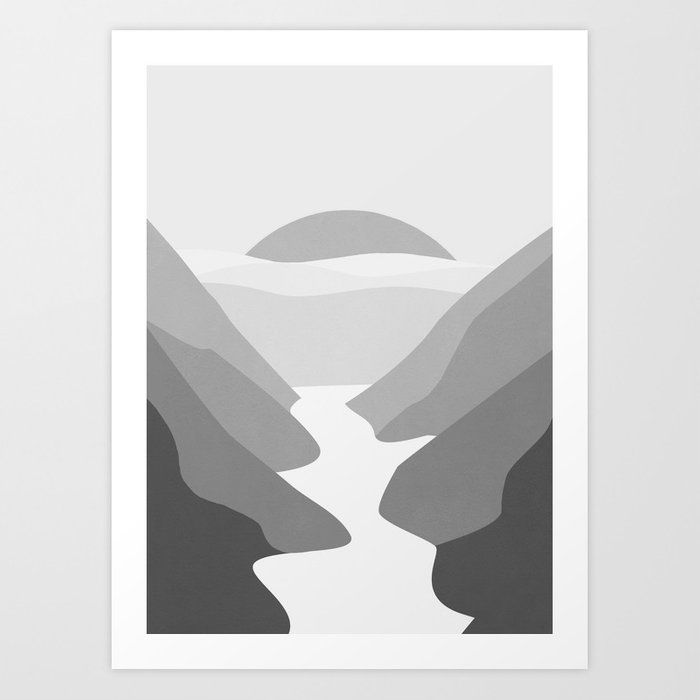

In [18]:
img = cv2.imread('eb9931c3f39215a193826992d013a17a.jpg',0) #to return a grascale image
# Save the image
cv2.imwrite('saveBack.png', img)

# Display the image
cv2_imshow(img)

# Wait for a key event indefinitely or for a specific delay
cv2.waitKey(0)

# Close all OpenCV windows
cv2.destroyAllWindows()




(700, 700, 3)
1470000


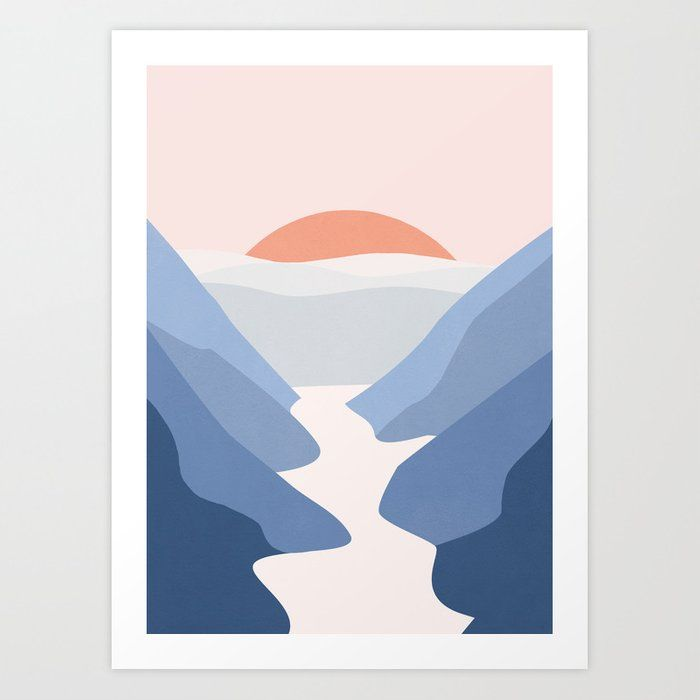

In [19]:
#Viewing image details
img = cv2.imread('/content/eb9931c3f39215a193826992d013a17a.jpg')
print(img.shape) #no. of rows and columns channels
print(img.size)  #no. of pixels

cv2_imshow(img)


2. Image type conversions viewing image data type

In [ ]:
print(img.dtype)

uint8


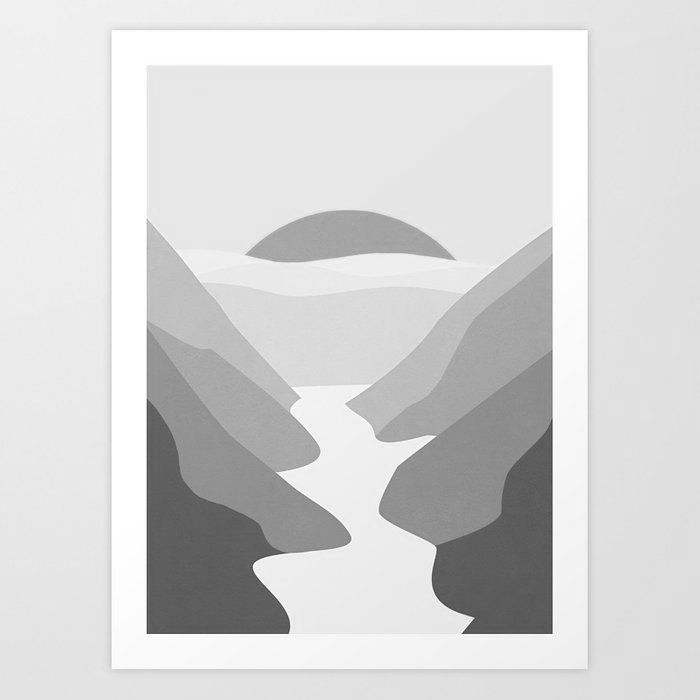

In [20]:
#converting from RGB to Grayscale
img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
cv2_imshow(img)

3. Basic Image Processing commands

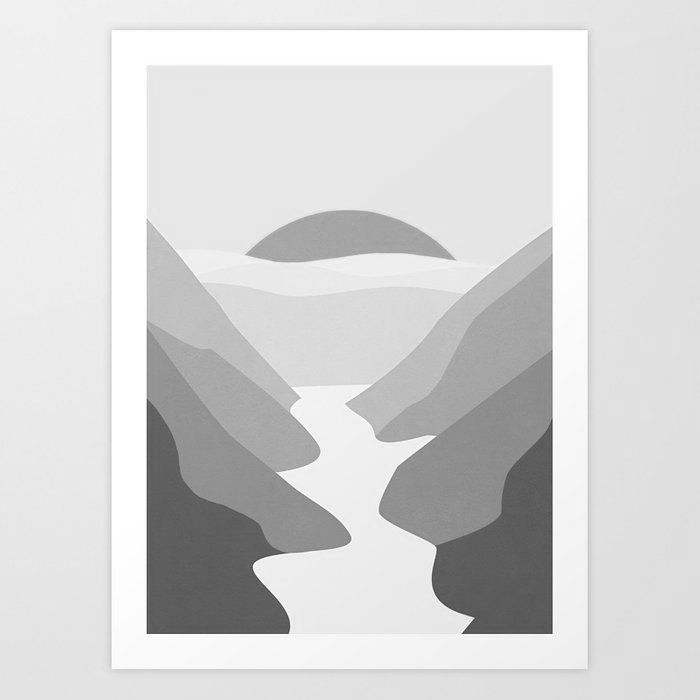

Original Image


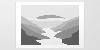

Resized Image (100x50)


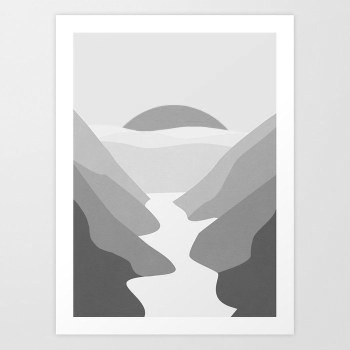

Resized Image (50% of Original)


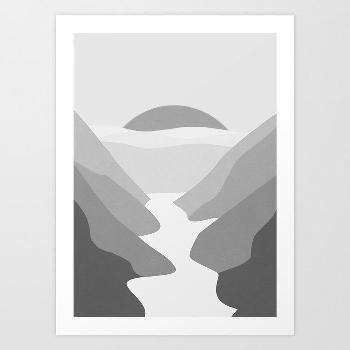

Resized Image (50% with Nearest Interpolation)


In [22]:

# Display the original image
cv2_imshow(img)
print("Original Image")

resized_image1 = cv2.resize(img,(100,50)) #reduce image to 100 cols and 50 rows
# Display the resized images
cv2_imshow(resized_image1)
print("Resized Image (100x50)")

resized_image2 = cv2.resize(img,(0,0), fx=0.5,fy=0.5) #reduce both axes by hal
cv2_imshow(resized_image2)
print("Resized Image (50% of Original)")

resized_image3 = cv2.resize(img,(0,0), fx=0.5, fy=0.5, interpolation=cv2.INTER_NEAREST) #SPECIFY INTERPOLATION METHOD
cv2_imshow(resized_image3)
print("Resized Image (50% with Nearest Interpolation)")

In [24]:
#Get dimensions of the image and calculate the center of the image
(h,w) = img.shape[:2]
center = (w/2,h/2)

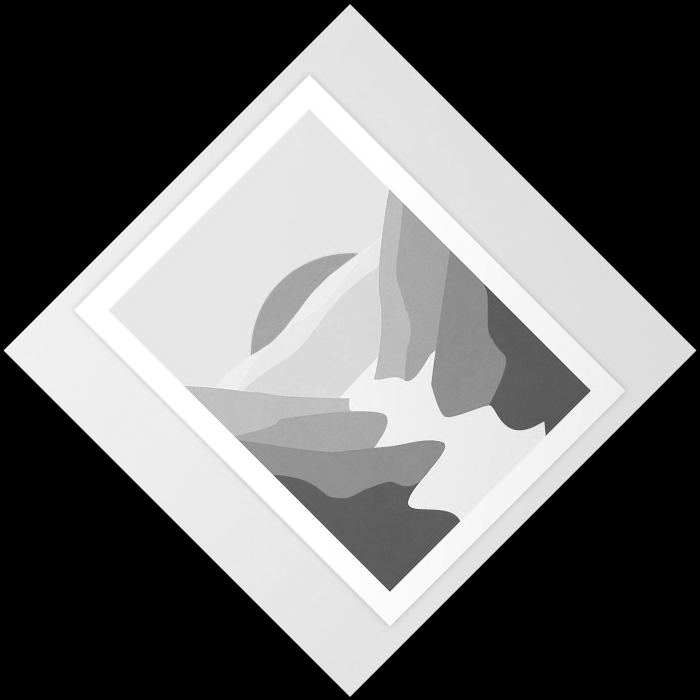

In [26]:
M = cv2.getRotationMatrix2D(center,45,0.7)

#Perform the actual rotation
rotated = cv2.warpAffine(img,M,(w,h))

cv2_imshow(rotated)

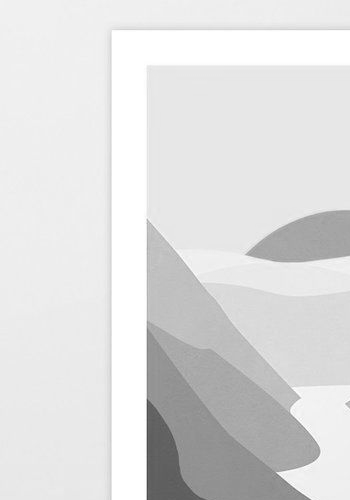

In [27]:
#Cropping
cropped = img[0:500, 0:350]
cv2_imshow(cropped)

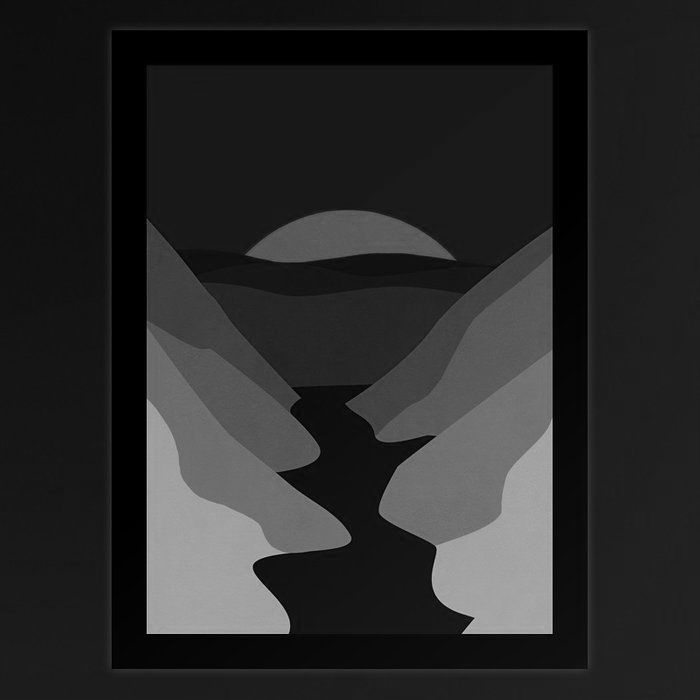

In [28]:
#Complementing
inverted = cv2.bitwise_not(img)
cv2_imshow(inverted)

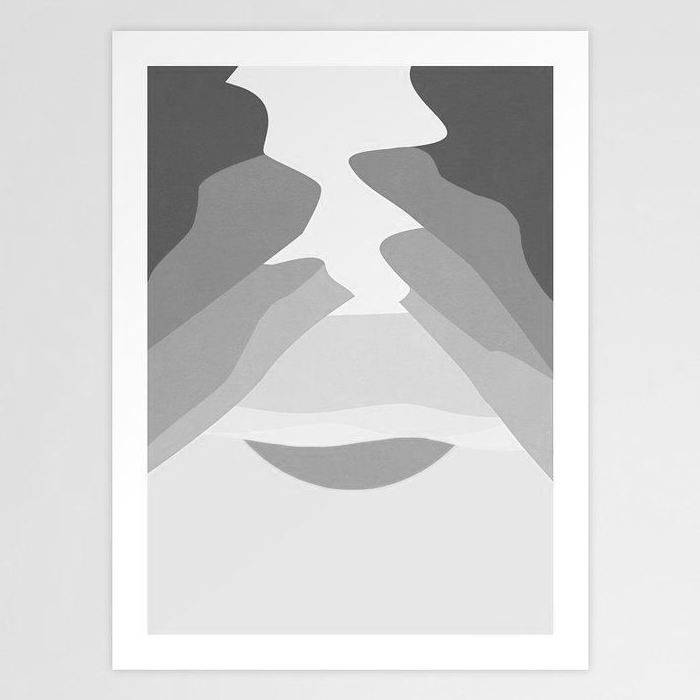

In [31]:
#flipping an image
flipped = cv2.flip(img,-1)
cv2_imshow(flipped)

**Section2: CSV to image conversion**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


img_data = pd.read_csv('/content/Digits_Lab_01.csv')


In [34]:
#Visualize the data as a table
img_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#reshape the rows of the data to images
Reshaped_images = img_data.to_numpy().reshape(-1,28,28,1)

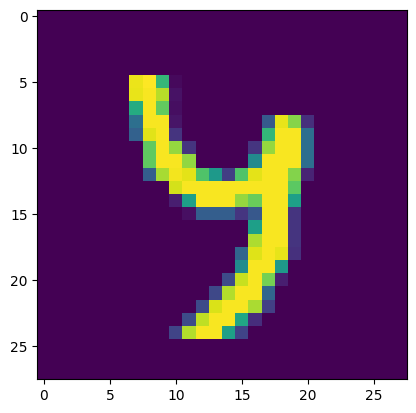

In [41]:
#visualize the imges
sample_img = np.array(Reshaped_images[12]).reshape(28,28)
plt.imshow(sample_img)
plt.show()


**Section 3: Geometric Transformation**

In [37]:
#read the image and check for the shape
img = cv2.imread('/content/eb9931c3f39215a193826992d013a17a.jpg')
rows,cols,ch = img.shape

print(rows,cols,ch)

700 700 3


In [38]:
#Define the transformation
pts1= np.float32([[50,50],[200,50],[50,200]])
pts2= np.float32([[10,100],[200,50],[100,250]])
M= cv2.getAffineTransform(pts1,pts2)


In [39]:
#Do the transformation
dst = cv2.warpAffine(img,M,(cols,rows))

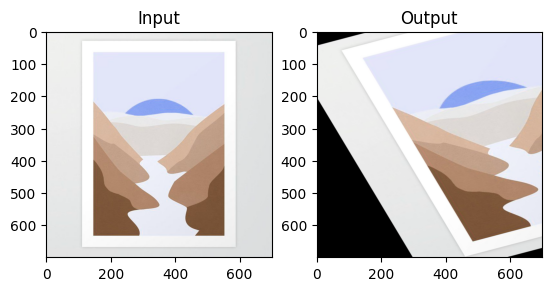

In [42]:
#Visualize the original and the transformed images
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

**Section 4: Lab tasks**

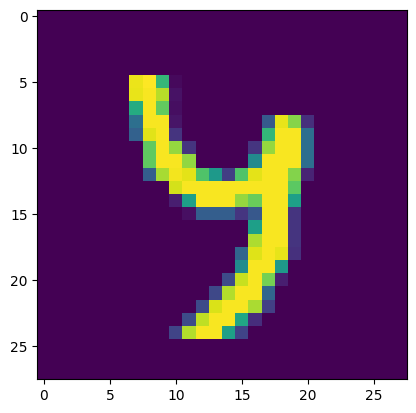

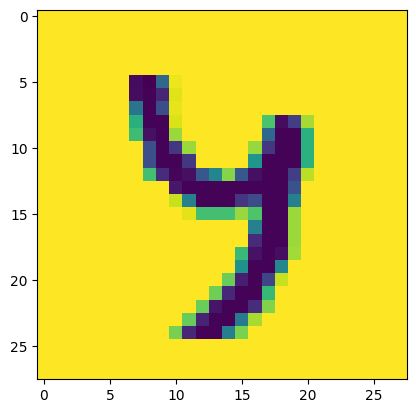

In [44]:
#Implement the following functions on your own without using PythonOpenCV
plt.imshow(sample_img)
plt.show()
#a. imcomplement(I) - Inverts I
import numpy as np

def imcomplement(I):
    return 255 - I  # Assuming I is in the range 0-255


# imcomplement_img=np.array(Reshaped_images[10]).reshape((28,28))
i = imcomplement(sample_img)
plt.imshow(i)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

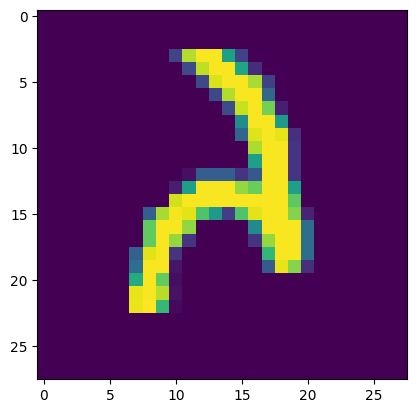

In [45]:
# b flipud(I) - Flips image along x-axis
def flipud(I):
    # Create an empty array of the same shape as the input image
    flipped_image = np.zeros_like(I)

    # Get the number of rows
    num_rows = I.shape[0]

    # Iterate through each row and assign it to the flipped position
    for i in range(num_rows):
        flipped_image[i, :] = I[num_rows - 1 - i, :]

    return flipped_image


f1 = flipud(sample_img)
plt.imshow(f1)
plt.show

In [49]:
f1 = np.fliplr(sample_img)

# Display the flipped image using OpenCV
cv2_imshow(f1)
cv2_imshow(sample_img)

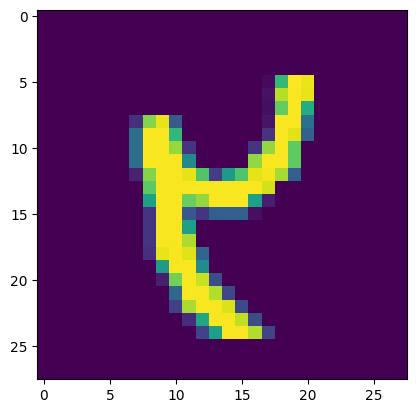

In [56]:
# c fliplr(I) - Flips image along y-axis

def fliplr(I):
   # Create an empty array of the same shape as the input image
    flippedlr_image = np.zeros_like(I)

    # Get the number of rows
    num_columns = I.shape[1]

    # Iterate through each row and assign it to the flipped position
    for j in range(num_columns):
        flippedlr_image[:, j] = I[:, num_columns - 1 - j]

    return flippedlr_image
f2 = fliplr(sample_img)
plt.imshow(f2)
plt.show()

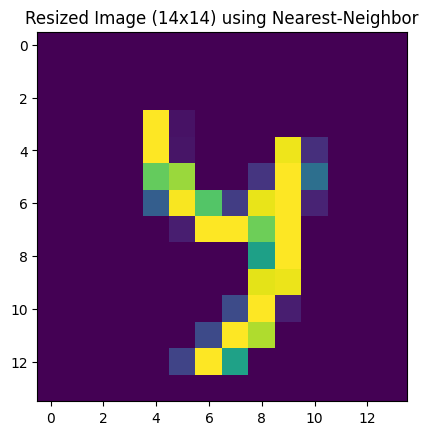

(14, 14)


In [62]:


# d imresize(I.[x y]) with nearest-neighbour interpolation
# Function to resize the image using nearest-neighbor interpolation
def imresize(I, size):
    new_height, new_width = size
    height, width = I.shape
    resized_image = np.zeros((new_height, new_width), dtype=I.dtype)

    for i in range(new_height):
        for j in range(new_width):
            # Calculate the nearest neighbor index
            nearest_i = int(i * height / new_height)
            nearest_j = int(j * width / new_width)
            resized_image[i, j] = I[nearest_i, nearest_j]

    return resized_image


resized_img = imresize(sample_img, (14, 14))
plt.title("Resized Image (14x14) using Nearest-Neighbor")
plt.imshow(resized_img)
plt.show()

print(resized_img.shape)



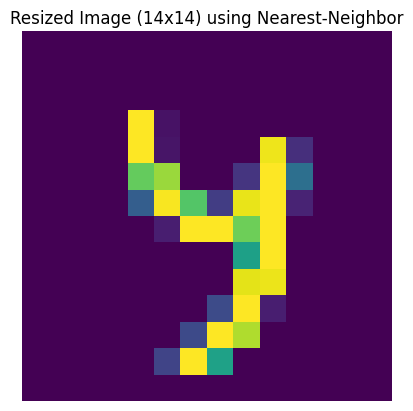

(14, 14)


In [61]:
Aimport cv2
import numpy as np
import matplotlib.pyplot as plt

# Using built-in OpenCV function to resize with nearest-neighbor interpolation
def imresize(I, size):
    return cv2.resize(I, size, interpolation=cv2.INTER_NEAREST)

# Load an image for demonstration (replace sample_img with your image)
# Assuming sample_img is defined and loaded earlier as a grayscale image

# Resize the image to a new size of (14, 14)
resized_img = imresize(sample_img, (14, 14))

# Display the resized image
plt.imshow(resized_img)
plt.title("Resized Image (14x14) using Nearest-Neighbor")
plt.axis('off')
plt.show()

# Print the shape of the resized image
print(resized_img.shape)


In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to read and convert an image to grayscale
def to_grayscale(image_path):
    # Read the image using OpenCV
    img = cv2.imread(image_path)
    # Convert to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray_img

# Load the image and convert to grayscale
grayScale_img = to_grayscale('/content/eb9931c3f39215a193826992d013a17a.jpg')


In [65]:
def flip_image(I, flip_code):
    flipped_img = cv2.flip(I, flip_code)
    return flipped_img

# Flip vertically (x-axis)
flipped_img = flip_image(grayScale_img, 0)


In [66]:
def resize_image(I, size):

  # Resize the image to the given size using nearest-neighbor interpolation
    resized_img = cv2.resize(I, size, interpolation=cv2.INTER_NEAREST)
    return resized_img

# Resizing the sample image to a new width of 100 pixels and height of 50 pixels
resized_img = resize_image(grayScale_img, (100, 50))


In [67]:
def rotate_image(I, angle):
    # Get the image's center
    center = (I.shape[1] // 2, I.shape[0] // 2)

    # Create the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

    # Perform the rotation
    rotated_img = cv2.warpAffine(I, rotation_matrix, (I.shape[1], I.shape[0]))
    return rotated_img

# Rotating the sample image by 45 degrees
rotated_img = rotate_image(grayScale_img, 45)


In [68]:
def translate_image(I, x, y):

    #  Create the translation matrix for shifting the image
    translation_matrix = np.float32([[1, 0, x],  # Horizontal translation
                                     [0, 1, y]])  # Vertical translation

    # Perform the translation using warpAffine, maintaining the original image size
    translated_img = cv2.warpAffine(I, translation_matrix, (I.shape[1], I.shape[0]))
    return translated_img

# Translating the sample image by 50 pixels to the right and 30 pixels down
translated_img = translate_image(grayScale_img, 50, 30)


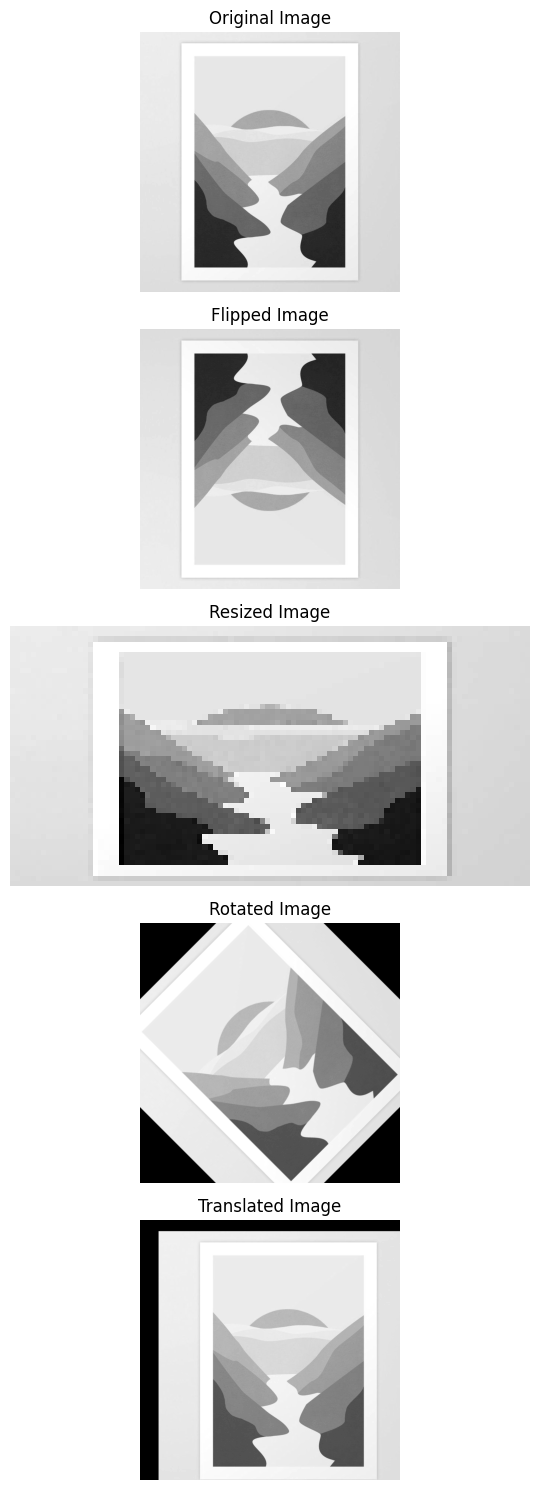

In [72]:
# Display the results
def display_images(images, titles):
    plt.figure(figsize=(15, 15))
    for i in range(len(images)):
        plt.subplot(5, 1, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display all the transformed images
display_images([grayScale_img, flipped_img, resized_img, rotated_img, translated_img],
               ["Original Image", "Flipped Image", "Resized Image", "Rotated Image", "Translated Image"])
